

> [Auto MPG Dataset Download  ](https://archive.ics.uci.edu/dataset/9/auto+mpg)




In [6]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets

# metadata
print(auto_mpg.metadata)
print(y)
# variable information
print(type(auto_mpg))
print(X.head())

{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

In [19]:
print(X.isnull().sum())

displacement    0
cylinders       0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


In [11]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split

x_dis = X.iloc[:,:1]
print(x_dis.head())
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(x_dis, y,
                                                    test_size=0.2,
                                                    random_state=11)

# 스케일링
for col in X_train.columns:
    scaler = StandardScaler()
    X_train[col] = scaler.fit_transform(X_train[[col]])
    X_test[col] = scaler.transform(X_test[[col]])

   displacement
0         307.0
1         350.0
2         318.0
3         304.0
4         302.0


In [21]:
print(y_train.head())
print(y_test.shape)

      mpg
11   14.0
173  24.0
246  32.8
262  19.2
12   15.0
(80, 1)


<ipython-input-12-b21e9f4326ad>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['displacement'])


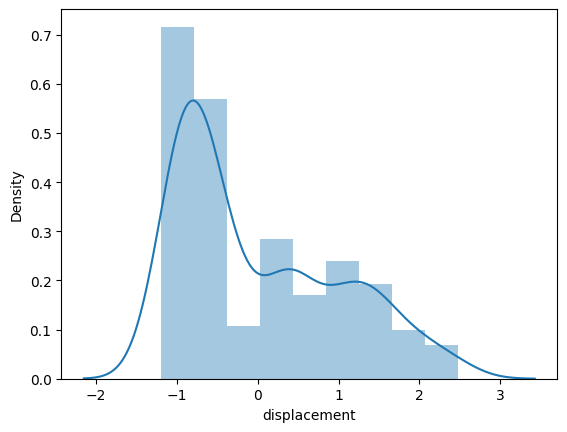

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(X_train['displacement'])
plt.show()


In [25]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# 모델 훈련 및 예측
models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet()
}

predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions[name] = model.predict(X_test)

### 시각화

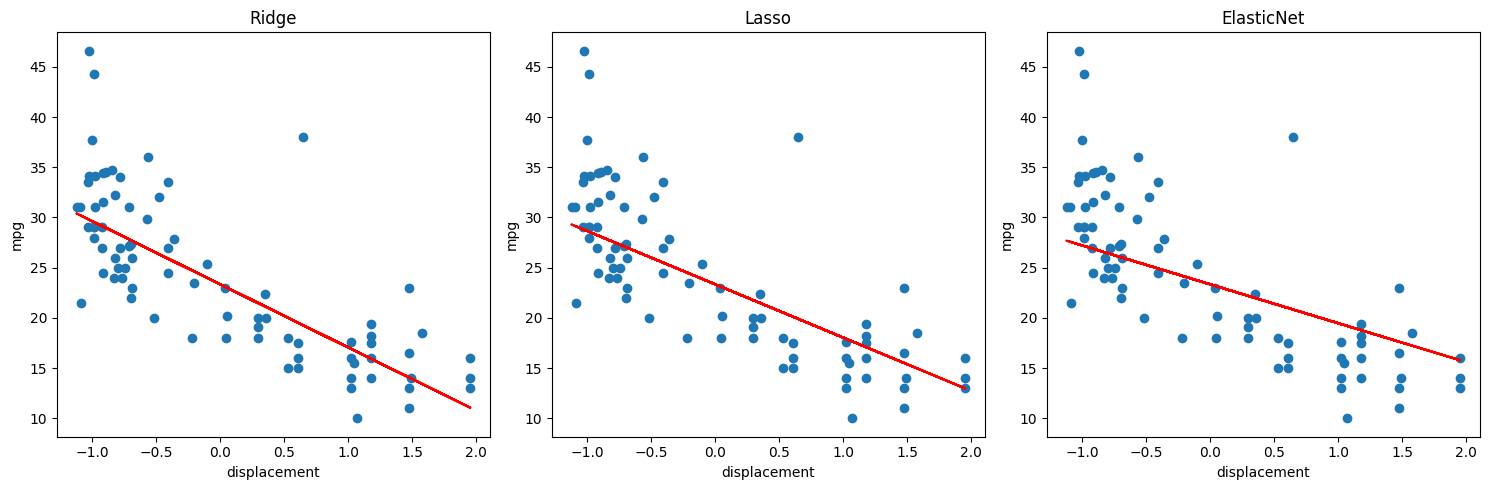

In [37]:
# 예측값 시각화
plt.figure(figsize=(15, 5))

x = X_test['displacement']
y = y_test['mpg']

for i, (name, pred) in enumerate(predictions.items(), 1):
  plt.subplot(1, 3, i)
  plt.plot(X_test, y_test, 'o')
  plt.plot(X_test, pred, 'r')
  plt.xlabel('displacement')
  plt.ylabel('mpg')
  plt.title(name)

plt.tight_layout()
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# 정량적 평가
metrics = {'MSE': mean_squared_error, 'MAE': mean_absolute_error, 'R2': r2_score}
results = {name: {} for name in models.keys()}

for name, pred in predictions.items():
    for metric_name, metric in metrics.items():
        results[name][metric_name] = metric(y_test, pred)

# 결과 출력
results_df = pd.DataFrame(results)
print(results_df)

         Ridge      Lasso  ElasticNet
MSE  25.163769  26.497780   31.528866
MAE   3.664580   3.736748    4.210088
R2    0.597813   0.576491    0.496081
